In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
data = pd.read_csv('wine.csv', sep=';')

In [32]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5,6
1195,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5,6
1196,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5,6
1197,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8,6


In [33]:
x = []
for i in range(0, 11):
    x.append(data.get(data.columns[i]).to_numpy())
y = np.array(data.get(data.columns[11]))

def getAB(X, Y):
    a = np.array(X).T
    b = Y.reshape(len(Y), 1)
    return a,b

def theta(A, B):
    theta_hat = np.linalg.inv(A.T@A)@(A.T@B)
    return theta_hat

def R(theta_hat):
    r = np.linalg.norm(A@theta_hat - B)
    return r

A, B = getAB(x, y)

print(A)
print(B)

[[ 7.4   0.7   0.   ...  3.51  0.56  9.4 ]
 [ 7.8   0.88  0.   ...  3.2   0.68  9.8 ]
 [ 7.8   0.76  0.04 ...  3.26  0.65  9.8 ]
 ...
 [ 7.9   0.58  0.23 ...  3.21  0.58  9.5 ]
 [ 7.7   0.57  0.21 ...  3.16  0.54  9.8 ]
 [ 7.7   0.26  0.26 ...  3.15  0.79 10.9 ]]
[[5]
 [5]
 [5]
 ...
 [6]
 [6]
 [6]]


In [34]:
# Question a
theta_hat = theta(A, B)
r = R(theta_hat)
print("Theta_hat: ")
print(theta_hat)
print("R: ", r)

Theta_hat: 
[[ 5.92516137e-03]
 [-1.10803754e+00]
 [-2.63046284e-01]
 [ 1.53222831e-02]
 [-1.73050274e+00]
 [ 3.80141908e-03]
 [-3.89899869e-03]
 [ 4.33858768e+00]
 [-4.58535475e-01]
 [ 7.29718662e-01]
 [ 3.08858648e-01]]
R:  22.124345965349157


45.09402140039561
78.45073907887128
107.43732921242005
89.94699653416463
100.32724721286986
114.34488415222931
123.21973022569276
28.09515101941108
30.173620355472238
52.13901501435205
25.018324730896044

The feature for the best result is:  alcohol
R min:  25.018324730896044
Theta_hat min:  [[0.54370552]]


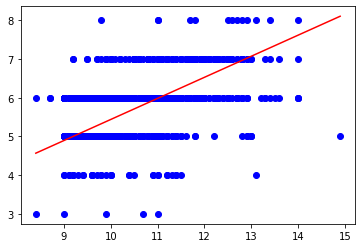

In [35]:
# Question b
R_min = 1000
Index_min = 0
Theta_min = 0

for i in range(11):
    A, B = getAB([x[i]], y)
    theta_hat = theta(A, B)
    r = R(theta_hat)
    print(r)
    if r < R_min:
        R_min = r
        Index_min = i
        Theta_min = theta_hat
print()
print("The feature for the best result is: ", data.columns[Index_min])
print("R min: ", R_min)
print("Theta_hat min: ", Theta_min)
draw_x = x[Index_min]
# print(x)
plt.plot(draw_x, y, 'o', color = 'blue')
X = np.linspace(min(draw_x), max(draw_x), 50)
model = [theta_hat[0]*i for i in X]
plt.plot(X, model, color ='red')
plt.show()

In [36]:
# Question c
y = np.log(y)
    
A, B = getAB(x, y)

theta_hat = theta(A, B)
r = R(theta_hat)
print("Theta_hat: ")
print(theta_hat)
print("R: ", r)

Theta_hat: 
[[ 1.57832971e-04]
 [-2.12045789e-01]
 [-5.80607860e-02]
 [ 2.01649410e-03]
 [-3.06787303e-01]
 [ 6.81324953e-04]
 [-6.56156417e-04]
 [ 1.56429590e+00]
 [-9.14536599e-02]
 [ 1.23889884e-01]
 [ 5.31476130e-02]]
R:  3.9921251036976857
